<h1 style="text-align: center; font-size: 36px;">Phase Model</h1>
A phase function $\Theta(x)$ defined by isochrons of an attracting limit cycle x can be used to define the infinitesimal phase response curve(iPRC). Indeed, given such $\Theta(x)$, we can apply an arbitrarily small voltage perturbation y along the limit cycle. By definition, the change in phase
\begin{equation}
\Delta \phi = \Theta(x + y) - \Theta(x) = \nabla_x \Theta(x)y
\end{equation}
is our iPRC if we ignore the higher order terms using the assumption of small voltage pertubation y. Let $Z(\phi) = \nabla_x\Theta(x)$.

Let $A(t) = D_x F(x)\bigg\rvert_{x_o}$, where $x_o$ is our limit cycle. We can use $A(t)$ to define a linear differential operator $L = \frac{d}{dt} - A(t)$, and the matrix adjoint to this differential equation is $-A(t)^T$ with a linear differential operator $L^* = \frac{d}{dt} + A(t)^T$. Since the phase is asymptotic in the neighborhood attraction of x, then we can say the derivative of phase with respect to time is zero, and the phase by defintion of $\Delta \phi$ is $Z(t)y(t)$. Therefore, we have
\begin{equation}
0 = \frac{d}{dt}Z(t)y(t) \Rightarrow (L^*Z)(t) = 0
\end{equation}
Moreover, since $\phi = \Theta(x(\phi))$, differentiating both sides with respect to $\phi$ gives $Z(\phi) \cdot \frac{dx(\phi)}{d\phi} = 1$. The above equation and this differential equation together defines a unique solution. The above iPRC derivation is from $\href{https://link.springer.com/book/10.1007/978-0-387-87708-2}{\text{Mathematical Foundation of Neuroscience by G. Bard Ermentrout , David H. Terman}}$, but trying to say them in my own words more concisely.


<h1 style="text-align: center; font-size: 36px;">Phase Model for Izhikevich Neuron</h1>
<ul>
  <li>1. Linearized System</li>
    From our previous bifurcation analysis, we have
    \begin{aligned}
        A(t) &= \begin{bmatrix} \dfrac{k(2v(t) - v_t - v_r)}{C} & \dfrac{-1}{C} \\ ab & -a \\ \end{bmatrix}
    \end{aligned}
    and $L = \dfrac{d}{dt} - A(t)$, and its adjoint linear differential operator is $L^* = \dfrac{d}{dt} + A(t)^T$, where
    \begin{equation}
        {A(t)}^T = \begin{bmatrix} \dfrac{k(2v(t) - v_t - v_r)}{C} & ab \\ \dfrac{-1}{C} & -a \\ \end{bmatrix}
    \end{equation}
    Then the linear differential equation defined by $L^*$ on vector $Z(t) = \begin{bmatrix} Z^v & Z^u \end{bmatrix}^T$, where $Z^v$ corresponds to the voltage, and $Z^u$ corresponds to the current, is the following:
    \begin{align*}
    \dfrac{dZ}{dt} &= \begin{bmatrix} \dfrac{-k(2\bar{v} - v_t - v_r)}{C} & -ab \\ \dfrac{1}{C} & a \\ \end{bmatrix} Z \\
    \begin{bmatrix} \dfrac{dZ^v}{dt} \\ \dfrac{dZ^u}{dt} \end{bmatrix} &= \begin{bmatrix} \dfrac{-k(2\bar{v} - v_t - v_r)}{C}Z^v - abZ^u \\ \dfrac{Z^v}{C} + aZ^u \end{bmatrix} \\
    \end{align*}
     where $\bar{v}, \bar{u}$ are asymptotically stable limit cycles over multiple period T.
  <li>2. Compuation of Adjoint Linear Differential System using Backward Euler Method</li>
    To obtain the limit cycle, we can use the backward Euler method, which is feasible in the case of linear differential equation. Most importantly, numerical damping exists in backward Euler method, and will get rid of the transient of the solution except the periodic orbit. Therefore, we need to keep the Izhikevich Neuron in regular firing model, and choose $b \in [-2, 5]$. We may choose more general values of b in later case after experimenting the model with backward euler.<br>
    Backward Euler Method: 
    \begin{equation}
    y_{n+1} = y_{n} + h f(t_{n + 1}, y_{n + 1})
    \end{equation}
    Applied to our linear DE is
    \begin{aligned}
    y_{n + 1} &= y_{n} + h A y_{n + 1} \\
    y_{n + 1} - hAy_{n+1} &=  y_n \\
    (I_{n\times n} - hA) y_{n + 1} &= y_n \\
    y_{n + 1} &= (I_{n \times n} - hA)^{-1}y_n \\
    \end{aligned}
    Replacing A with $-A(t)^T$, we have
    \begin{equation}
    y_{n + 1} = (1 + hA^T)^{-1}y_n \\
    \end{equation}
    Note: the backward method usually works for continuous system, however, for discontinuous system, we still need to try to see if it works. 
    
  <li>3 $Z(\phi)\cdot\frac{dx(\phi)}{d\phi} = 1$ </li>
  In here, we follow the same approach from the paper $\href{https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002478}{\text{Impact of adaptation currents on synchronization of coupled exponential integrate-and-fire neurons}}$.<br> For the normalization condition, note that 
  \begin{aligned}
  Z(\phi)\cdot\frac{d\bar{x}(\phi)}{d\phi} &= Z(\phi)\cdot f(\bar{x}(\phi)) \\
  \text{Choose } \phi = 0 &\Rightarrow Z(0) \cdot f(\bar{x}(0)) = 1 \\
  \end{aligned}
  Since the Izhikevich Neuron is discontinuous, we need to account for that by imposing the condition 
  \begin{align*}
  Z(0) &= BZ(T^-) \\
  \text{with } B &= (\dfrac{d\bar{v}}{dt}(0))^{-1} \begin{bmatrix} \dfrac{d\bar{v}}{dt}(T^-) & \dfrac{d\bar{u}}{dt}(T^-) - \dfrac{d\bar{u}}{dt}(0) \\ 
                                                               0 & \dfrac{d\bar{v}}{dt}(0) \end{bmatrix}
  \end{align*}
  where $\bar{v}, \bar{u}$ are asymptotically stable limit cycles over multiple period T. We choose $\bar{v}(0) = c$, the reset, and $\bar{v}(T^-) = v_{\text{peak}}$, the voltage threshold. Indeed, we take only the values of $\bar{v}$ from c to $v_{\text{peak}}$ inclusive. However, instead of satisfying the condition with the B matrix, we can choose to satisfy the following condition,
  \begin{align*}
  Z^u(0) = Z^u(T^-)
  \end{align*}
  Moreover, since we assume a perturbation $y(t)$ given to $Z(t)$ is only non-zero in the first component, therefore, we can conclude $Z^v$ is our iPRC.
</ul>

# Bounary Value Problem:
In our case, we can write our boundary conditions as 
\begin{align*}
\begin{bmatrix} Z^v(0) & Z^u(0) \end{bmatrix} \begin{bmatrix} \dfrac{d\bar{v}}{dt}(0) \\ \dfrac{d\bar{u}}{dt}(0)  \end{bmatrix} - 1 &= 0 \\
Z^v(0) \dfrac{d\bar{v}}{dt}(0) + Z^u(0) \dfrac{d\bar{u}}{dt}(0) - 1&= 0 \\
Z^u(0) - Z^u(T^-) &= 0 \\
\end{align*}

To solve the Boundary Value Problem, we can use Trapezoidal rule:
\begin{equation}
y_{n + 1} = y_n + \frac{h}{2}(f(t_n, y_n), f(t_{n+1}, y_{n+1})),  n = 0, ... , N
\end{equation}
and apply it to our iPRC, we have
\begin{align*}
Z_{n+1} &= Z_n + \frac{h}{2}(R(t_n)Z_n + R(t_{n+1})Z_{n+1}) \\
(I - \frac{h}{2}R(t_{n+1})) Z_{n+1} &= (I + \frac{h}{2}R(t_n))Z_n \\
(I - \frac{h}{2}R(t_{n+1})) Z_{n+1} - (I + \frac{h}{2}R(t_n))Z_n &= 0 \\
\end{align*}
where I is the 2 by 2 identity matrix. The normalization conditions translates to 
\begin{equation}
Z(0) \cdot f(\bar{x})(0) = 1 \Rightarrow Z_0 \cdot \begin{bmatrix} \dfrac{d\bar{v}}{dt}(0) \\ \dfrac{d\bar{u}}{dt}(0) \end{bmatrix} = 1
\end{equation}
The continuity condition translates to 
\begin{equation}
Z^u(0) - Z^u(T^-) = 0 \Rightarrow Z_0^u - Z_N^u = 0
\end{equation}
Then, we can put the above in a big matrix in the form of $RZ = b$, and solve for inverse of R. In our case, the R is $-A(t)^T$. <br>
So, let's denote the 
\begin{align*}
\alpha_i &= -I - \frac{h}{2}R(t_i) \\
\alpha_i &= \begin{bmatrix}-1 & 0 \\ 0 & -1 \end{bmatrix} - \frac{h}{2} \begin{bmatrix}\dfrac{-k(2\bar{v}(t_i) - v_t - v_r)}{C} & -ab \\ \dfrac{1}{C} & a\end{bmatrix} \\
\alpha_i &= \begin{bmatrix} -1 + \dfrac{hk(2\bar{v}(t_i) - v_t - v_r)}{2C} & \dfrac{abh}{2} \\ \dfrac{-h}{2C} & -1 - \dfrac{ah}{2}  \end{bmatrix}
\end{align*}
and 
\begin{align*}
\beta_i &= I - \frac{h}{2} R(t_{i+1}) \\
\beta_i &= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} - \frac{h}{2}  \begin{bmatrix} \dfrac{-k(2\bar{v}(t_{i+1}) - v_t - v_r)}{C} & -ab \\ \dfrac{1}{C} & a \end{bmatrix} \\
\beta_i &= \begin{bmatrix} 1 + \dfrac{hk(2\bar{v}(t_{i + 1}) - v_t - v_r)}{2C} & \dfrac{abh}{2} \\ \dfrac{-h}{2C} & 1 - \dfrac{ah}{2} \end{bmatrix}
\end{align*}
$\alpha_i = - (I + \frac{h}{2}A(t_i))$, $\beta_i =(I - \frac{h}{2}A(t_{i+1}))$,  i = 1...N-1, then we have a matrix of the following form
\begin{equation}
\begin{bmatrix}
\alpha_0 & \beta_0 & 0 & \cdot & \cdot & \cdot & 0 \\
0 & \alpha_1 & \beta_1 & 0 & \cdot & \cdot & \cdot \\
0 & 0 & \cdot & \cdot & \cdot & \cdot & 0 \\ 
0 & \cdot & \alpha_i & \beta_i & \cdot & \cdot & 0  \\
0 & \cdot & \cdot & \alpha_{i + 1} & \beta_{i+1} & \cdot & 0  \\
0 & \cdot & \cdot & \cdot & \cdot & \cdot & 0 \\ 
0 & \cdot & \cdot & \cdot & 0 & \alpha_{N - 1} & \beta_{N - 1} \\
0 & 1 & 0 & \cdot & \cdot & \cdot & -1 \\
\frac{d\bar{v}}{dt}(0) & \frac{d\bar{u}}{dt}(0) & 0 & \cdot & \cdot & \cdot & 0 \\
\end{bmatrix}
\begin{bmatrix}
Z_0^v \\ Z_0^u \\ Z_1^v \\ Z_1^u \\ \cdot \\ \cdot \\ \cdot \\ Z_N^v \\ Z_N^u
\end{bmatrix} =
\begin{bmatrix}
0 \\ 0 \\ \cdot \\ \cdot \\ \cdot \\ 0 \\ 0 \\ 0 \\ 1
\end{bmatrix}
\end{equation}
where each $Z_i = \begin{bmatrix} Z^v_i & Z^u_i \end{bmatrix}^T$, and each $0 \in \mathbb{R}^{2 \times 2}$

In [211]:
from tqdm import tqdm
import numpy as np
from numpy.linalg import inv, pinv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.integrate import solve_bvp
from scipy.linalg import inv
import copy
import scipy.integrate as integrate


%matplotlib inline

In [213]:
class izhikevich_model:
    def __init__(self, C=100, k=0.7, vr=-60, vt=-40, a=0.03, b=-2, c=-50, d=100, vpeak=35, alpha = 0.5, beta = 0.5):
        
        '''
        An initation of the izhikevich model with default model parameters.

        Attributes:
            C - Capacitance
            k - coefficents
            vr - resting membrane potential
            vt - 
            vpeak - peak of the voltage
            c - voltage reset value
            d - current reset value
            info - prints the numerical value of the Izhikevich model
        '''
        
        self.C = C
        self.k = k
        self.vr = vr
        self.vt = vt
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.vpeak = vpeak
        self.h = 0.01
        self.T = 5 * 3000

    def model_info(self):
        '''
        prints the izhikevich model with numerics.

        Args:

        Return:
            None
        '''
        info = (
            f"The model is of the form:\n"
            f"Cv̇ = {self.k}(v - {self.vr})(v - {self.vt}) - u + Iapp\n"
            f"u̇ = {self.a}({self.b}(v - {self.vr}) - u)\n"
            f"if v >= {self.vpeak}\n"
            f"v → {self.c}, u → u + {self.d}\n"
        )
        print(info)
        return None
                
   
    def linear_A(self, v):
        '''
        Computes the linearized Izhikevich model.

        Args:
            v (array of float): voltage solution of the Izhikevich  model.
            
        Returns:
            numpy shape - N x 2 x 2: linearized Izhikevich model evaluated at each v_i in v.
        '''
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b

        A_linear = []
        for v_i in v:
            A_linear.append(np.array([[(k/C)*(2 * v_i - vt - vr), -1/C], [a*b, a]]))

        return np.array(A_linear)
    
    def adjoint_A(self, v):
        '''
        Computes the adjoint of the linearized Izhikevich model.

        Args:
            v (array of float): voltage solution of the Izhikevich model.

        Returns:    
            numpy shape - N x 2 x 2: adjoint of linearized Izhikevich model evaluated at each v_i in v.
        '''
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b
        A_adjoint = []
        
        for v_i in v:
            adjoint_matrix = np.array([[(-k/C) * (2 * v_i - vt - vr), -a * b], [1/C, a]])
            A_adjoint.append(adjoint_matrix)

        return np.array(A_adjoint)

    def forward_euler(self, IC, h, T, I_app):
        '''
        Compute an instance of the Izhikevich model using Forward Euler method.

        Args:
            IC (numpy array - 2): intital condition
            h (float): time step
            T (int) : end time
            I_app (float): current applied to the Izhikevich neuron

        Returns:   
            dictionary:
            {
            voltage (numpy array of floats): voltage solution of the neuron 
            current (numpy array of floats): current solution of the neuron
            time (numpy array of floats): integration time 
            peak time (numpy array of floats): time at which neuron fires
            peak index (numpy array of floats): index of the time at which neuron fires
            dv (numpy array of floats): RHS of the Izhikevich model for the neuron's voltage
            du (numpy array of floats): RHS of the Izhikevich model for the neuron's current
            }
        '''        
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        vpeak = self.vpeak

        datapoints = int(T / h)
        time = np.linspace(0, T, datapoints)
        v = np.zeros(datapoints)
        u = np.zeros(datapoints)
        peak_time = np.array([])
        peak_idx = np.array([])
        dv = np.zeros(datapoints)
        du = np.zeros(datapoints)

        v[0] = IC[0]
        u[0] = IC[1]

        for i in range(datapoints - 1):
            v[i + 1] = v[i] + (h/C) * (k * (v[i] - vr) * (v[i] - vt) - u[i] + I_app[i])
            u[i + 1] = u[i] + h * a * (b * (v[i] - vr) - u[i])

            dv[i] = (1/C) * (k * (v[i] - vr) * (v[i] - vt) - u[i] + I_app[i])
            du[i] = a * (b * (v[i] - vr) - u[i])

            if v[i + 1] >= vpeak:
                v[i] = vpeak
                v[i + 1] = c
                u[i + 1] = u[i + 1] + d
                peak_time = np.append(peak_time, time[i])
                peak_idx = np.append(peak_idx, i)
            # We choose to compute the dv after the update because that will keep 
            # the change at the keep consistent
            
            

        results = {
            'voltage': v,
            'current': u,
            'time': time,
            'peak time': peak_time,
            'peak index': peak_idx.astype(int),
            'dv': dv,
            'du': du
        }
        return results

    def fourth_order_RK(self, IC, h, T, I_app):
        '''
        Compute an instance of the Izhikevich model using Fourth Order RK method.

        Args:
            IC (numpy array - 2): intital condition
            h (float): time step
            T (int) : end time
            I_app (float): current applied to the Izhikevich neuron

        Returns:   
            dictionary:
            {
            voltage (numpy array of floats): voltage solution of the neuron 
            current (numpy array of floats): current solution of the neuron
            time (numpy array of floats): integration time 
            peak time (numpy array of floats): time at which neuron fires
            peak index (numpy array of floats): index of the time at which neuron fires
            }
        '''        
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        vpeak = self.vpeak

        datapoints = int(T / h)
        time = np.linspace(0, T, datapoints)
        v = np.zeros(datapoints)
        u = np.zeros(datapoints)
        peak_time = np.array([])
        peak_idx = np.array([])
        
        for i in range(datapoints - 1):
            k1 = np.array([v[i], u[i]])
            f_k1 = np.array([
                (k * (k1[0] - vr) * (k1[0] - vt) - k1[1] + I_app[i]) / C,
                 a * (b * (k1[0] - vr) - k1[1])
            ])
            k2 = k1 + 0.5 * h * f_k1
            f_k2 = np.array([
                (k * (k2[0] - vr) * (k2[0] - vt) - k2[1] + I_app[i]) / C,
                 a * (b * (k2[0] - vr) - k2[1])
            ])
            k3 = k1 + 0.5 * h * f_k2
            f_k3 = np.array([
                (k * (k3[0] - vr) * (k3[0] - vt) - k3[1] + I_app[i]) / C,
                a * (b * (k3[0] - vr) - k3[1])
            ])
            k4 = k1 + h * f_k3
            f_k4 = np.array([
                (k * (k4[0] - vr) * (k4[0] - vt) - k4[1] + I_app[i]) / C,
                a * (b * (k4[0] - vr) - k4[1])
            ])
            update = k1 + h/6 * (f_k1 + 2 * f_k2 + 2 * f_k3 + f_k4)

            v[i + 1] = update[0]
            u[i + 1] = update[1]
            if v[i+1] >= vpeak:
                v[i] = vpeak
                v[i+1] = c
                u[i+1] = u[i+1] + d
                peak_time = np.append(peak_time, time[i])
                peak_idx = np.append(peak_idx, i)

        results = {
            'voltage': v,
            'current': u,
            'time': time,
            'peak time': peak_time,
            'peak index': peak_idx.astype(int)
        }
        return results
    
    def I_b(self):
        '''
        Computes the value of current applied needed for bifurcation of the
        Izhikevich neuron.

        Args:

        Returns:
            float: bifurcation value of the Izhikevich neuron. 
        '''

        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b
        c = self.c
        d = self.d

        if self.b <= C*a:
            return (((vt - vr)*k + self.b) ** 2)/ (4*k)
        else:
           return (-((vr-vt)*k + C*a - 2*self.b)*((vt-vr)*k + C*a))/(4*k)


    def compute_bifur_value(self, IC):
        '''
        computes the important bifurcation values, critical current at which neuron fires and 
        the equilbrium points at which SN or AH bifurcation occurs

        return None
        '''
        
        k = self.k
        vr = self.vr
        vt = self.vt
        C = self.C
        a = self.a
        b = self.b

        stable_lc = self.get_stable_soln(IC, 0.25, 5 * 3000)

        critical_current = self.I_b()
        
        if b > C * a:
            critical_eq = (C*a + k*(vr+vt))/(2*k)
        elif b < C * a:
            critical_eq = (b + k*(vr+vt))/(2*k)
        else:
            critical_eq = (C*a + k*(vr + vt))/(2*k)
        
        critical_eq = -47.86
        min_distance = min(abs(x - critical_eq) for x in stable_lc['voltage'])
        closest_to_critical_eq = [x for x in stable_lc['voltage'] if abs(x - critical_eq) == min_distance]
        closest_to_critical_eq = np.array(closest_to_critical_eq)

        print('--------------------------------------------------------------------------------')
        print(f'For b = {np.round(b, 2)}, we have')
        print(f'current at which neuron fires: {np.round(critical_current, 2)}')
        print(f'Eq pts at which SN/AH occurs: {np.round(critical_eq, 2)}')
        print(f'Points along the LC that is closes to the Eq pts above: {np.round(closest_to_critical_eq, 2)}')
        print('--------------------------------------------------------------------------------')

        return None


    def get_stable_soln(self, IC, h, T):
        '''
        Retrieves the voltage solution of the Izhikevich neuron between the 3rd and 4th spike, 
        where there are more than 15 peaks in the voltage solution overall, and the difference
        between the time of each peak is less than 2 (ms). This way, we ensure the solution is stable.

        Args:
            IC (numpy array - 2): intital condition
            h (float): time step
            T (int) : end time
            I_app (float): current applied
        
        Returns:
            numpy array of floats: voltage solution of the Izhikevich neuron between the 3rd
                                    and 4th spike.
            numpy array of floats: time steps corresponding to the voltage solution of the 
                                    Izhikevich neuron between the 3rd and 4th spike.
        '''       
        datapoints = int(T / h)
        multiplier = np.linspace(1.0, 1.25, 26)
        for mult in multiplier:
            I_app = np.zeros(datapoints)
            I_app_type = 'constant'
            if I_app_type == 'step':
                I_app[int(0.1 * datapoints):] = mult * self.I_b()
            else:
                I_app[:] = mult * self.I_b() * 1
            trail_soln = self.forward_euler(IC, h, T, I_app)
            periods = np.diff(trail_soln['peak time'])
            period_diff = np.diff(periods)
            if len(period_diff) == 0:
                continue
            if np.mean(period_diff) <= 2 and len(trail_soln['peak time']) >= 5:
                start_idx = (trail_soln['peak index'][2] + 1).astype(int)
                end_idx = (trail_soln['peak index'][3]).astype(int)
                stable_lc = trail_soln['voltage'][start_idx:end_idx + 1]
                stable_time = trail_soln['time'][start_idx:end_idx + 1]
                dv_at_init_lc = (trail_soln['voltage'][start_idx] - trail_soln['voltage'][start_idx - 1]) / h
                du_at_init_lc = (trail_soln['current'][start_idx] - trail_soln['current'][start_idx - 1]) / h
                dv_at_lc = trail_soln['dv'][start_idx:end_idx + 1]
                du_at_lc = trail_soln['du'][start_idx:end_idx + 1]
                # We normalize the phase just as we did it in the PRC
                period = stable_time[-1] - stable_time[0]
                phases_lc = np.linspace(0, stable_time[-1] - stable_time[0], len(stable_time))/period
                stable_sol = {'voltage': stable_lc, 'time': stable_time,'phase': phases_lc, 
                              'initial_f': [dv_at_init_lc, du_at_init_lc], 'I_app': I_app[-1],
                              'dv': dv_at_lc, 'du': du_at_lc}
                return stable_sol
            else:
                continue
        return None 


    def iPRC_solve_bvp(self, IC, h, T):
        '''
        We try scipy.integrate.solve_bvp to solve the boundary value problem 
        created from iPRC by taking IC

        return:
        sol: a class from solve_bvp that has sol.x to be the x_values, and
             sol.y[i] i = 1, 2 to be the value of the fisrt and second variable
             of the iPRC
        '''
        
        k = self.k
        vr = self.vr
        vt = self.vt
        C = self.C
        a = self.a
        b = self.b

        # Define our global variables
        stable_lc = self.get_stable_soln(IC, h, T)
        t_array = stable_lc['time'] - stable_lc['time'][0] 

        def continuous_v(current_t):
            '''
            Define the continuous version of voltage using np.interp so we can
            pass it into our system of ode in iPRC_ode
            '''
            my_voltage = np.interp(current_t, t_array, stable_lc['voltage'])
            return my_voltage
                                                  
        def iPRC_ode(t, z):
            '''
            define our system of ordinary differential equations, where z is a vector
            of two elements, the first is Z^v, the second is Z^u, t is time 
            '''
            iPRC_eq1 = -(k/C)*(2*continuous_v(t) - vt - vr) * z[0] - a * b * z[1]
            iPRC_eq2 = z[0]/C + a * z[1]
            return np.array([iPRC_eq1, iPRC_eq2])

        def bc(ya, yb):
            '''
            define our boundary condition, where ya is a vector of two elements dictating
            the boundary condition at the left, yb is a vector of two elements dictating
            the boundary condition at the right
            '''
            dv = stable_lc['dv']
            du = stable_lc['du']
            bc_1 = (ya[0] * dv[0] + ya[1] * du[0]) - 1
            bc_2 = ya[1] - yb[1]
            return np.array([bc_1, bc_2])

        # Define the initial guess
        y0 = np.ones((2, len(t_array))) * 0.025
        
        # Pass everything into the solve_bvp from scipy.integrate
        # This looks like a crazy max number of nodes, maybe we don't need that
        # however, this makes the sol.message to print out 'The algorithm 
        # converged to the desired accuracy.'. The shape looks similiar without 
        # setting this parameter
        sol = solve_bvp(iPRC_ode, bc, t_array, y0, max_nodes=500000)
        
        # We should normalize the time, divide it by period and since we 
        # normalized the time, we should also divide the iPRC by the period?
        period = t_array[-1] - t_array[0]
        sol.x = (sol.x - sol.x[0]) / period
        sol.y[0] = sol.y[0] / period
        sol.y[1] = sol.y[1] / period

        return sol

    def interaction_func(self, IC, beta, v_syn):
        '''
        We compute the interaction function of two neurons using iPRC and synaptic input using
        IC, the initial condition, and alpha, the opening rate, and beta, the closing rate

        Return:
        
        '''
        h = 0.01
        T = 3000 * 5
        stable_lc = self.get_stable_soln(IC, h, T)
        Z_t = self.iPRC_solve_bvp(IC, h, T)

        period = stable_lc['time'][-1] - stable_lc['time'][0]

        # pre-allocate memeory for the interaction function
        stable_lc_len = len(stable_lc['voltage'])
        H_func = np.zeros(stable_lc_len)
        s_add = 1
        integral_limit = (stable_lc['time'] - stable_lc['time'][0])
        voltage_diff = stable_lc['voltage'] - v_syn

        # we need to compute G_j using the synaptic input s_j
        for phi in tqdm(range(stable_lc_len), leave=False):
            s_j = np.zeros(stable_lc_len)
            peak_pos = stable_lc_len - 1 - phi
            time_to_decay = np.linspace(0, h * (phi + 1), (phi + 1))
            s_j[peak_pos:] = s_add * np.exp(-beta * time_to_decay)
            G_j = - s_j * voltage_diff
            # integrate iPRC * G_j over 0 to T
            res = integrate.simpson(Z_t.y[0] * G_j, x = integral_limit)/period
            H_func[phi] = res           

        H_diff = np.flip(H_func) - H_func
        H_diff_zero = np.where(np.abs(H_diff) < 1e-5)
        phase = stable_lc['time'] - stable_lc['time'][0]
        phase_locking_state = phase[H_diff_zero]

        result = {'H': H_func,
                  'H difference': H_diff,
                  'phi': phase,
                  'I_app': stable_lc['I_app'],
                 'phase locking state': phase_locking_state,
                 'iPRC x': Z_t.x,
                 'iPRC y': Z_t.y[0]}
        return result

    def neuron_sync(self, IC, beta, v_syn, g_syn):
        '''
        neuron_sync: computes the the neuron synchorization of the two izhikevich neuron
        with with only the beta rate. 

        Return:
        
        '''
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        vpeak = self.vpeak
        h = self.h
        T = self.T
        
        datapoints = int(T / h)
        time = np.linspace(0, T, datapoints)

        v = np.zeros([2, datapoints], dtype=np.float64)
        u = np.zeros([2, datapoints], dtype=np.float64)
        s = np.zeros([2, datapoints], dtype=np.float64)

        # The following are peak time, and the indices at which peak occurs
        peak_time_n1 = np.array([], dtype = np.float64)
        peak_time_n2 = np.array([], dtype = int)
        peak_idx_n1 = np.array([], dtype = np.float64)
        peak_idx_n2 = np.array([], dtype = int)

        # Neuron 1
        v1 = v[0]
        u1 = u[0]
        s1 = s[0]
        
        # Neuron 2
        v2 = v[1]
        u2 = u[1]
        s2 = s[1]

        # Inserting IC for each variable
        v1[0] = IC[0][0]
        v2[0] = IC[1][0]
        u1[0] = IC[0][1]
        u2[0] = IC[1][1]
        s1[0] = IC[0][2]
        s2[0] = IC[1][2]


        stable_lc = self.get_stable_soln([self.vr, 0], h, T)
        I_app1 = np.zeros(datapoints) + stable_lc['I_app']
        I_app2 = np.zeros(datapoints) + stable_lc['I_app']
        # I_app2[:int(datapoints * 0.07)] = 0
                

        for i in range(datapoints - 1):
            # pre-synaptic neuron
            v1[i + 1] = v1[i] + h * ((k * (v1[i] - vr) * (v1[i] - vt) - u1[i] + I_app1[i])/C - g_syn * s2[i] * (v1[i] - v_syn))
            u1[i + 1] = u1[i] + h * (a * (b * (v1[i] - vr) - u1[i]))
            s1[i + 1] = s1[i] + h * -beta * s1[i]
            # post-synaptic neuron
            v2[i + 1] = v2[i] + h * ((k * (v2[i] - vr) * (v2[i] - vt) - u2[i] + I_app2[i])/C - g_syn * s1[i] * (v2[i] - v_syn))
            u2[i + 1] = u2[i] + h * (a * (b * (v2[i] - vr) - u2[i]))
            s2[i + 1] = s2[i] + h * -beta * s2[i]

            if v1[i + 1] >= vpeak:
                v1[i] = vpeak
                v1[i + 1] = c
                u1[i + 1] += d
                s1[i + 1] = 1
                peak_time_n1 = np.append(peak_time_n1, time[i])
                peak_idx_n1 = np.append(peak_idx_n1, i)
                
            if v2[i + 1] >= vpeak:
                v2[i] = vpeak
                v2[i + 1] = c
                u2[i + 1] += d
                s2[i + 1] = 1
                peak_time_n2 = np.append(peak_time_n2, time[i])
                peak_idx_n2 = np.append(peak_idx_n2, i)
            
        results = {
            'v1' : v1,
            'v2' : v2,
            'u1': u1,
            'u2': u2,
            's1': s1,
            's2': s2,
            'peak time neuron 1': peak_time_n1,
            'peak time neuron 2': peak_time_n2,
            'peak index neuron 1': peak_idx_n1,
            'peak index neuron 2': peak_idx_n2,
            'time': time,
            'I_app': stable_lc['I_app']
        }
        
        return results

In [215]:
simple_model = izhikevich_model()
IC = np.array([simple_model.vr, 0])
simple_model.model_info()

The model is of the form:
Cv̇ = 0.7(v - -60)(v - -40) - u + Iapp
u̇ = 0.03(-2(v - -60) - u)
if v >= 35
v → -50, u → u + 100



# Testing the model to obtain conclusions from the model

102.3369642857143


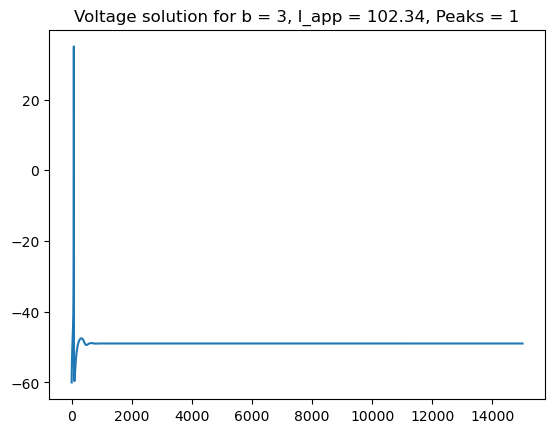

In [235]:
# It seems that decreasing d increase the number of spikes fired for the same
# value of b. For example the neuron with b = -2 fires 16 peaks at d = 100, while
# the neuron with b = -2 fires 17 peaks at d = 50, and the neuron with b = -2 fires
# 140 peaks at d = 20. This may indicates we are further away from the current 
# threshold at which the neuron fires. However, for larger values the b, the
# neuron first starts firing at the current bifurcation I_b, and fires before the
# current bifurcaiton I_b. 
simple_model.d = 100
simple_model.b = 3
h = 0.1
T = 3000 * 5
I_app = np.zeros(int(T/h)) +  simple_model.I_b() * 0.9915 #use 0.978 for b = 5 #use 0.984 for b = 4
print(I_app[0])
voltage_soln = simple_model.forward_euler(IC, h, T, I_app)
plt.plot(voltage_soln['time'], voltage_soln['voltage'])
plt.title(f"Voltage solution for b = {simple_model.b}, I_app = {round(I_app[-1], 2)}, Peaks = {len(voltage_soln['peak index'])}")
plt.show()

In [746]:
simple_model.b = 3
result = simple_model.interaction_func(IC, 0.8, 0)
phase_delay = np.where(result['iPRC y'] < 0)
print(f'The total number of elements in the iPRC array is: {len(result["iPRC y"])}')
print(f'The number of negative phase change in the iPRC array is: {len(phase_delay[0])}')
print(f'The first 10 elements of negative phase change is: {result["iPRC y"][phase_delay[0][0:10]]}')

The total number of elements in the iPRC array is: 24889
The number of negative phase change in the iPRC array is: 8651
The first 10 elements of negative phase change is: [-0.0011291  -0.00112854 -0.00112798 -0.00112742 -0.00112687 -0.00112632
 -0.00112577 -0.00112522 -0.00112467 -0.00112412]


Text(0.5, 1.0, 'iPRC for b = 3 and I_app = 103.21')

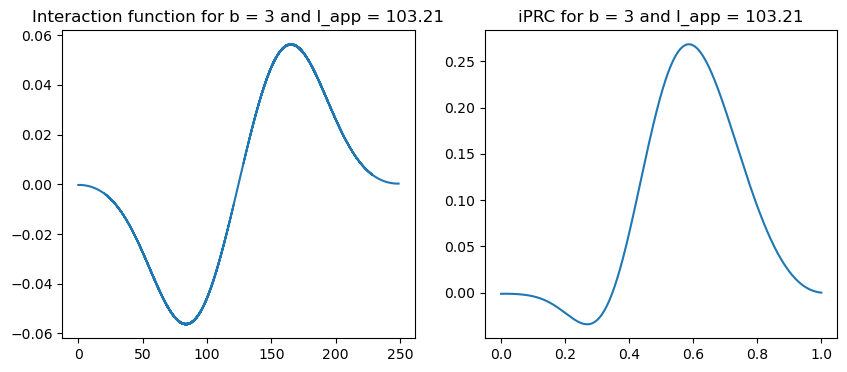

In [748]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 
axs[0].plot(result['phi'], result['H difference'])
axs[0].set_title(f'Interaction function for b = {simple_model.b} and I_app = {np.round(result["I_app"],2)}')

axs[1].plot(result['iPRC x'], result['iPRC y'])
axs[1].set_title(f'iPRC for b = {simple_model.b} and I_app = {np.round(result["I_app"],2)}')

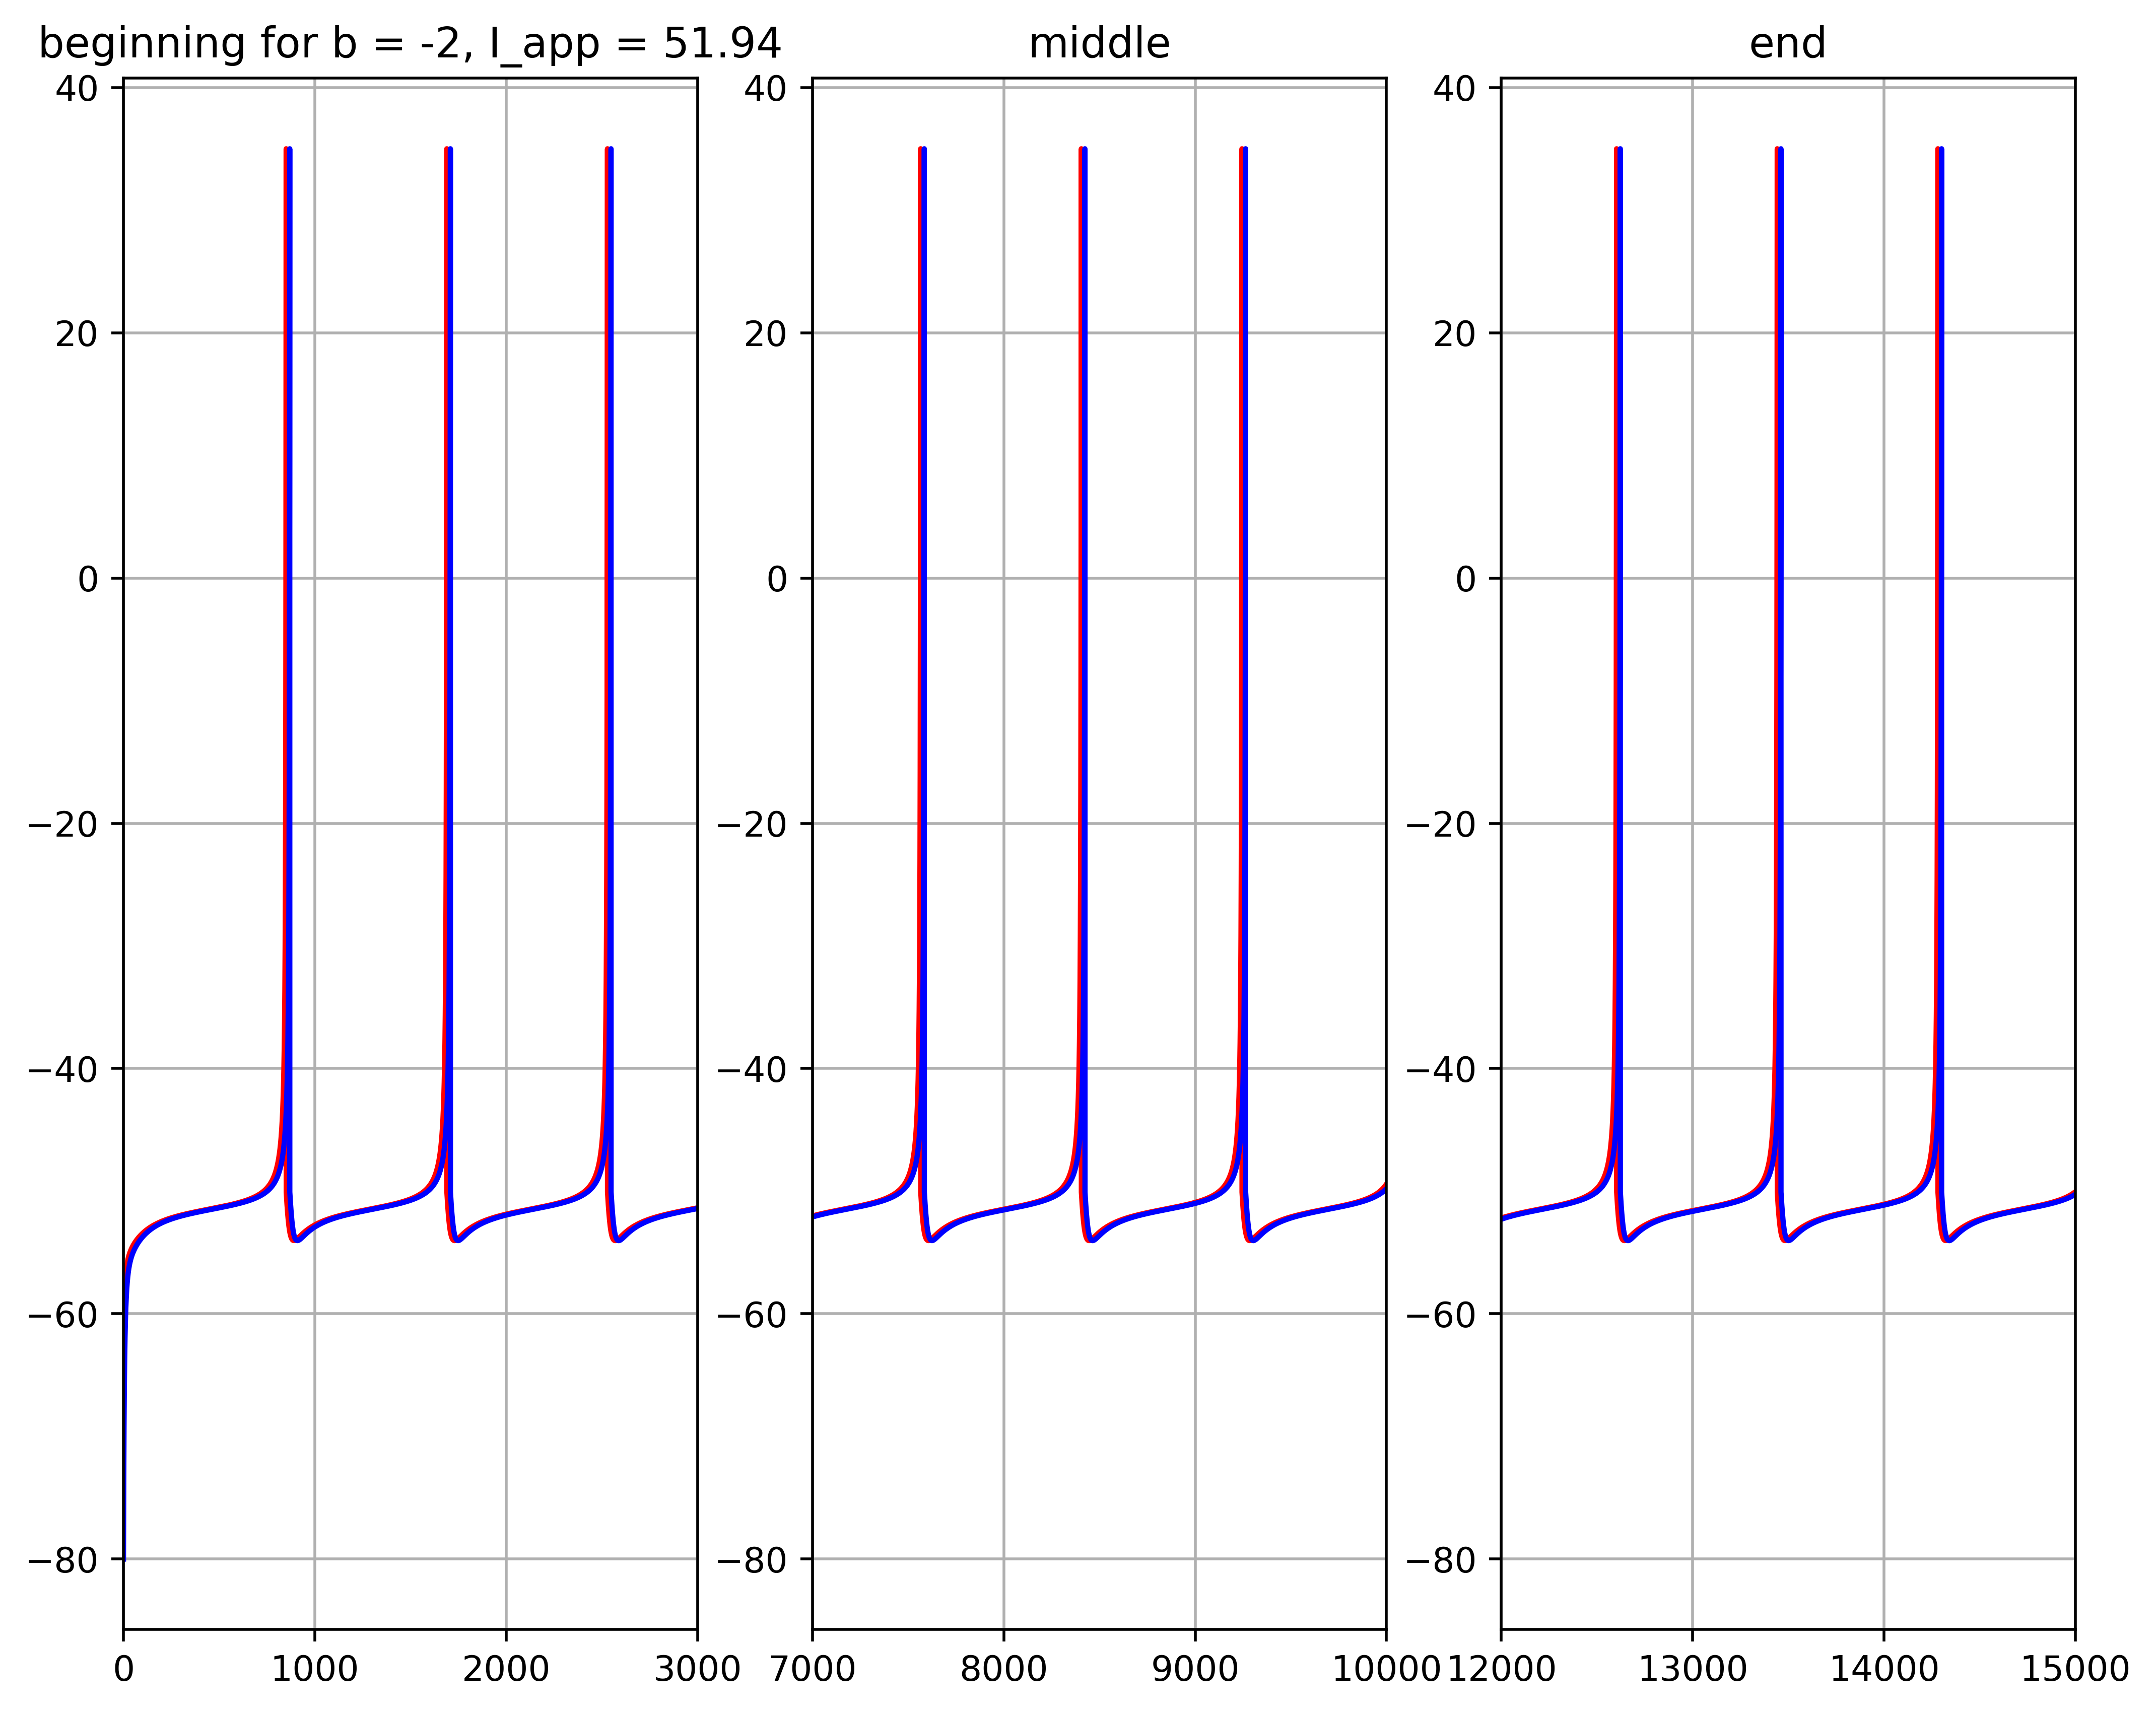

In [191]:
IC_sync = np.array([[simple_model.vr, 0, 0], [simple_model.vr-20, 0, 0]])
beta = 0.8
v_syn = 0
g_syn = 0.0001
simple_model.d = 50
simple_model.b = -2
fig, axs = plt.subplots(1, 3, figsize=(10, 8), dpi = 500)  # 1x3 grid of subplots
neuron_sync_soln = simple_model.neuron_sync(IC_sync, beta, v_syn, g_syn)
# neuron_interact = simple_model.interaction_func(IC, 0.8, 0)

axs[0].plot(neuron_sync_soln['time'], neuron_sync_soln['v1'], color = 'red')
axs[0].plot(neuron_sync_soln['time'], neuron_sync_soln['v2'], color = 'blue')
axs[0].set_title(f"beginning for b = {simple_model.b}, I_app = {round(neuron_sync_soln['I_app'], 2)}")
if simple_model.b >= 3:
    axs[0].set_xlim([0, 1000])
else:
    axs[0].set_xlim([0, 3000])
axs[0].grid(True)

axs[1].plot(neuron_sync_soln['time'], neuron_sync_soln['v1'], color = 'red')
axs[1].plot(neuron_sync_soln['time'], neuron_sync_soln['v2'], color = 'blue')
axs[1].set_title('middle')
if simple_model.b >= 3:
    axs[1].set_xlim([9000, 10000])
else:
    axs[1].set_xlim([7000, 10000])
axs[1].grid(True)

axs[2].plot(neuron_sync_soln['time'], neuron_sync_soln['v1'], color = 'red')
axs[2].plot(neuron_sync_soln['time'], neuron_sync_soln['v2'], color = 'blue')
axs[2].set_title('end')
if simple_model.b >= 3:
    axs[2].set_xlim([14000, 15000])
else:
    axs[2].set_xlim([12000, 15000])
axs[2].grid(True)

Based on the voltage solution of the izhikevich neuron, we observe that before b = 1.9, the neuron fires more frequently as b and $I_{app}$ increases, however, as soon as we reach b = 1.9, we see that the neuron actually fires less frequently even though b and $I_{app}$ increases. Then as b and $I_{app}$ increases, we see that the neuron fires more frequently. This is why we see a change of pattern in our interaction function difference. Now, the questions remains, why is a change in the frequency of the neuron firing changes the interaction function, and whether we could show the the change in the interaction function through the synchronization of two neurons. 

A phase function $\Theta(x)$ defined by isochrons of an attracting limit cycle x can be used to define the infinitesimal phase response curve(iPRC). Indeed, given such $\Theta(x)$, we can apply an arbitrarily small voltage perturbation y along the limit cycle. By definition, the change in phase
\begin{equation}
\Delta \phi = \Theta(x + y) - \Theta(x) = \nabla_x \Theta(x)y
\end{equation}
From b = 1.8 to b = 1.9, we see that the neuron fires less frequently, and therefore will have a longer limit cycle. Let us denote the limit cycle before b = 1.9 as $x_1$, and the limit cycle since b = 1.9 as $x_2$. In our numerical simulation, there will be more points in $x_2$ than $x_1$. We can also define two phase functions, $\Theta(x_1)$ and $\Theta(x_2)$. Since the phase function is defined by the isochrons of an attracting limit cycle, and the isochron is defined by the set of initial conditions that will ultimately result in the same long-term behaviour, then all the points near the attracting limit cycle belong to the isochron since limit cycle attracts all nearby solutions. Therefore, the set $\lvert \Theta(x_1) \rvert < \lvert \Theta(x_2) \rvert$. 

From our numerical simulation, we see that the interaction function has phase goes from 0 to 300 for b = 1.8, but 0 to 500 for b = 1.9. Therefore, our previous analysis does corroborate with our numerical simulation.

The phase change between two phase functions are respectively $\Delta \phi_1 = \Phi(x_1 + y)  - \Phi(x_1) = \nabla_{x_1} \Theta(x_1) y$, $\Delta \phi_2 = \Phi(x_2 + y)  - \Phi(x_2) = \nabla_{x_2} \Theta(x_2) y$. Then we can let $Z_1(\phi) = \nabla_{x_1} \Theta(x_1), Z_2(\phi) = \nabla_{x_2} \Theta(x_2)$.

In [1]:
pdf_name = f'voltage solution with 25 peaks.pdf'
IC_sync = np.array([-40, -20])
beta = 0.8
v_syn = 0
g_syn = 0.05
simple_model.d = 100
h = 0.01
T = 3000 * 5
b_array = np.linspace(-2, 5, 71)
pdf = PdfPages(pdf_name)
for b_idx in tqdm(range(len(b_array))):
    simple_model.b = b_array[b_idx]
    stable_lc = simple_model.get_stable_soln(IC, h, T)
    I_app = stable_lc['I_app'] + np.zeros(int(T/h))
    soln = simple_model.forward_euler(IC, h, T, I_app)
    fig = plt.figure(dpi = 500)
    plt.plot(soln['time'], soln['voltage'], color = 'rosybrown')
    plt.title(f"Voltage Solution for b = {round(b_array[b_idx], 3)} and I_app = {round(I_app[-1], 2)}, peaks = {len(soln['peak index'])}")
    plt.xlabel('time')
    plt.ylabel('voltage')
    pdf.savefig()
    plt.close(fig)
pdf.close()

In [ ]:
IC_sync = np.array([[-40, -20, 0], [-60, 0, 0]])
beta = 0.8
v_syn = 0
g_syn = 0.05
simple_model.d = 100
neuron_sync_soln = simple_model.neuron_sync(IC_sync, beta, v_syn, g_syn)
I_app = np.zeros(len(neuron_sync_soln['time'])) + neuron_sync_soln['I_app']

plt.plot(neuron_sync_soln['time'], neuron_sync_soln['v1'], color = 'blue')
plt.plot(neuron_sync_soln['time'], neuron_sync_soln['v2'], color = 'red')
plt.xlim([12000, 15000])

In [ ]:
h = 0.01
T = 5 * 3000
simple_model.b = -2.0
datapoints = int(T/h)
stable_lc = simple_model.get_stable_soln(IC, h, T)
fig = plt.figure()
plt.title(f"Periodic Solution for b = {1.7} for I_app = {I_app[-1]}, with period = {round(stable_lc['time'][-1] - stable_lc['time'][0], 1)}")
plt.plot(soln['time'], soln['voltage'])
plt.plot(stable_lc['time'], stable_lc['voltage'])
plt.xlabel('time (ms)')
plt.ylabel('voltage')
plt.xlim([0, 5000])
plt.savefig('periodic solution for b = 1.7.png')
plt.close(fig)

In [ ]:
IC_sync = np.array([[simple_model.vr+20, 0, 0], [simple_model.vr-20, -50, 0]])
g_syn = 0.01
simple_model.d = 100
pdf_name = f'Validation of Interaction Function with 25 peaks and d = 100.pdf'
pdf = PdfPages(pdf_name)
b_array = np.linspace(-2, 5, 71)
for b_idx in tqdm(range(len(b_array))):
    simple_model.b = b_array[b_idx]
    neuron_sync_soln = simple_model.neuron_sync(IC_sync, 0.8, 0, g_syn)
    H_soln = simple_model.interaction_func(IC, 0.8, 0)
    fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi = 500)  # 2x2 grid of subplots
    # Plot on each subplot
    axs[0, 0].plot(H_soln['phi'], H_soln['H difference'], color = 'rosybrown')
    axs[0, 0].set_title(f"H_diff for b = {round(b_array[b_idx], 3)} and I_app = {round(H_soln['I_app'], 2)}")
    axs[0, 0].set_xlabel(r'$\phi$')
    axs[0, 0].set_ylabel(r'$H(\phi)$')
    
    axs[0, 1].plot(neuron_sync_soln['time'], neuron_sync_soln['v1'], color = 'red')
    axs[0, 1].plot(neuron_sync_soln['time'], neuron_sync_soln['v2'], color = 'blue')
    axs[0, 1].set_title('Neuron Synchorization at the beginning')
    if b_array[b_idx] >= 3:
        axs[0, 1].set_xlim([0, 1000])
    else:
        axs[0, 1].set_xlim([0, 2000])
    axs[0, 1].grid(True)
    
    axs[1, 0].plot(neuron_sync_soln['time'], neuron_sync_soln['v1'], color = 'red')
    axs[1, 0].plot(neuron_sync_soln['time'], neuron_sync_soln['v2'], color = 'blue')
    axs[1, 0].set_title('Neuron Synchorization at the middle')
    if b_array[b_idx] >= 3:
        axs[1, 0].set_xlim([9000, 10000])
    else:
        axs[1, 0].set_xlim([8000, 10000])
    axs[1, 0].grid(True)
    
    axs[1, 1].plot(neuron_sync_soln['time'], neuron_sync_soln['v1'], color = 'red')
    axs[1, 1].plot(neuron_sync_soln['time'], neuron_sync_soln['v2'], color = 'blue')
    axs[1, 1].set_title('Neuron Synchorization at the end')
    if b_array[b_idx] >= 3:
        axs[1, 1].set_xlim([14000, 15000])
    else:
        axs[1, 1].set_xlim([13000, 15000])
    axs[1, 1].grid(True)
    # Adjust layout
    fig.tight_layout()
    pdf.savefig()
    plt.close(fig)
pdf.close()

In [ ]:
pdf_name = f'interaction function with 45 peaks.pdf'
simple_model.d = 100
pdf = PdfPages(pdf_name)
b_array = np.linspace(-2, 5, 71)
for b_idx in tqdm(range(len(b_array))):
    simple_model.b = b_array[b_idx]
    result = simple_model.interaction_func(IC, 0.8, 0)
    fig = plt.figure(dpi = 500)
    plt.plot(result['phi'], result['H difference'], color = 'rosybrown')
    plt.title(f"Difference of Interaction Function for b = {round(b_array[b_idx], 3)} and I_app = {round(result['I_app'], 2)}")
    plt.xlabel(r'$\phi$')
    plt.ylabel(r'$H(\phi)$')
    pdf.savefig()
    plt.close(fig)
pdf.close()

In [ ]:
pdf_name = f'iPRC trial.pdf'
pdf = PdfPages(pdf_name)
b_array = np.linspace(-2, 5, 71)
simple_model.d = 100
for i in tqdm(range(len(b_array))):
    simple_model.b = b_array[i]
    solution = simple_model.iPRC_solve_bvp(IC, 0.25, 3000 * 5)
    fig = plt.figure(dpi = 600)
    plot_title = f'iPRC when b = {round(b_array[i], 3)}'
    plt.title(plot_title)
    plt.xlabel('phase')
    plt.ylabel('change in phase')
    plt.plot(solution.x, solution.y[0],'bo', markersize = 1)
    plt.plot(solution.x, solution.y[0], 'r', linewidth = 0.5)
    # uncomment the following line if you want to see the status
    # of the bvp_solver
    # print(solution.message)
    plt.grid()
    pdf.savefig()
    plt.close(fig)
pdf.close()

In [ ]:
solution = simple_model.interaction_func(IC, 0.8, 0)
fig = plt.figure()
plt.plot(solution['phi'], solution['H difference'], color = 'rosybrown')
plt.title(f"Difference of Interaction Function for I_app = {round(solution['I_app'], 2)}")
plt.close(fig)

In [ ]:
# pdf_name = f'iPRC Zu.pdf'
# pdf = PdfPages(pdf_name)
# b_array = np.linspace(-2, 5, 71)
# for i in tqdm(range(len(b_array))):
#     simple_model.b = b_array[i]
#     solution = simple_model.iPRC_solve_bvp(IC, 0.25)
#     fig = plt.figure(dpi = 600)
#     plot_title = f'iPRC when b = {round(b_array[i], 3)}'
#     plt.title(plot_title)
#     plt.xlabel(f'phase')
#     plt.ylabel(f'$Z^v$')
#     # Since we integrated on the time in which stable limit cycle
#     # is obtained, then we need to scale the iPRC and the time by
#     # getting the period of solution.x and then divide the iPRC and
#     # time by period
#     stable_lc = simple_model.get_stable_soln(IC, 1, 5000)
#     period = solution.x[-1] - solution.x[0]
#     period = stable_lc['time'][-1] - stable_lc['time'][0]
#     iPRC_time = (solution.x - solution.x[0]) / period
#     iPRC_sol_v = solution.y[0] / period
#     iPRC_sol_u = solution.y[1] / period
#     plt.plot(iPRC_sol_v, iPRC_sol_u, 'bo', markersize = 1)
#     plt.grid()
#     pdf.savefig()
#     plt.close(fig)
# pdf.close()

In [ ]:
# vr = -60
# IC = np.array([vr, 0])
# simple_model = izhikevich_model()

# b_array = np.linspace(-2, 5, 71)
# for i in range(len(b_array)):
#     simple_model.b = b_array[i]
#     simple_model.compute_bifur_value(IC)

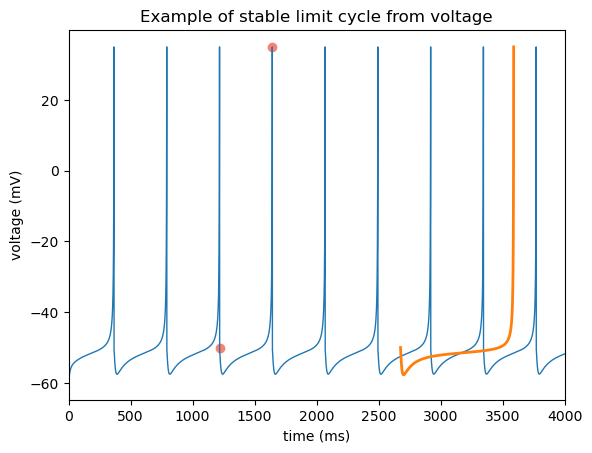

In [17]:
simple_model.b = -2
stable_lc = simple_model.get_stable_soln(IC, 0.25, 5 * 3000)
I_app = np.zeros(int(5 * 3000 / 0.25))
I_app[:] = 1.048360655737705 * simple_model.I_b()
normal_soln = simple_model.forward_euler(IC, 0.25, 5 * 3000, I_app)
fig = plt.figure()
plt.plot(normal_soln['time'], normal_soln['voltage'], linewidth = 1)
plt.plot(stable_lc['time'], stable_lc['voltage'], linewidth = 2)
plt.scatter(normal_soln['time'][normal_soln['peak index'][2] + 1], normal_soln['voltage'][normal_soln['peak index'][2] + 1], color = 'salmon')
plt.scatter(normal_soln['time'][normal_soln['peak index'][3]], normal_soln['voltage'][normal_soln['peak index'][3]], color = 'salmon')
plt.xlim([0, 4000])
plt.title('Example of stable limit cycle from voltage')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
fig.savefig('Example of stable limit cycle from voltage')

In [ ]:
# I_app = np.zeros(int(T / h))
# I_app[int(0.2*int(T/h)):] = simple_model.I_b() * 1.03
# result = simple_model.forward_euler(IC, h, T, I_app)
# plt.plot(result['time'], result['dv'], linewidth = 1)
# plt.plot(result['peak time'], result['voltage'][(result['peak index'])], 'ro', markersize = 3)
# plt.plot(result['time'], result['dv'])
# print(result['dv'][result['peak index']])
# print(result['voltage'][result['peak index']])

In [ ]:
# simple_model = izhikevich_model()

# stable_lc, interp_voltage = simple_model.iPRC_solve_bvp(IC)
# plt.plot(stable_lc['time'], stable_lc['voltage'], 'bo', markersize = 3)
# plt.plot(stable_lc['time'], interp_voltage, 'ro', markersize = 0.5)
# print(np.linalg.norm(stable_lc['voltage'] - interp_voltage))

# Figure for the paper

In [217]:
simple_model = izhikevich_model()
IC = np.array([simple_model.vr, 0])
simple_model.model_info()

The model is of the form:
Cv̇ = 0.7(v - -60)(v - -40) - u + Iapp
u̇ = 0.03(-2(v - -60) - u)
if v >= 35
v → -50, u → u + 100



## Figure 2.1 a

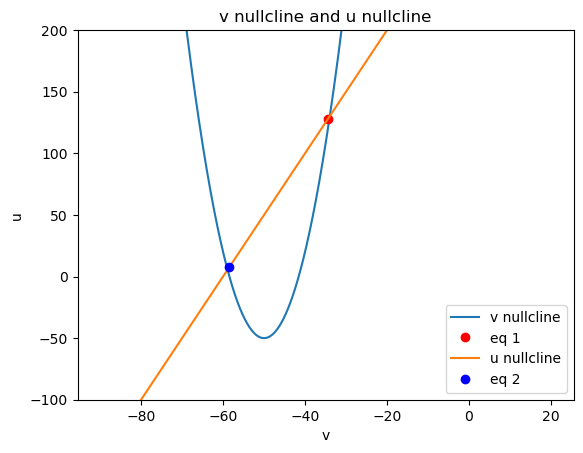

In [76]:
I = 20
v = np.linspace(-90, 20, 10000)
v_null = I + k*(v - vr)*(v - vt)
u_null = b*(v-vr)
v_eq1 = (k*vt + k*vr + b + np.sqrt((vr-vt)**2 * k**2 + (-2*vr*b+2*b*vt-4*I)*k + b))/(2*k)
u_eq1 = b*(v_eq1 - vr)
v_eq2 = (k*vt + k*vr + b - np.sqrt((vr-vt)**2 * k**2 + (-2*vr*b+2*b*vt-4*I)*k + b))/(2*k)
u_eq2 = b*(v_eq2 - vr)

fig = plt.figure()
plt.plot(v, v_null, label = 'v nullcline')
plt.plot(v_eq1, u_eq1, 'ro', label = 'eq 1')
plt.plot(v, u_null, label = 'u nullcline')
plt.plot(v_eq2, u_eq2, 'bo', label = 'eq 2')
plt.title('v nullcline and u nullcline')
plt.ylim(-100, 200)
plt.xlabel('v')
plt.ylabel('u')
plt.legend(loc="lower right")
plt.show()
fig.savefig(fname='/Users/chengxinye/Documents/USRA Spring 2024/Figures_for_paper/Nullclines.pdf', format="pdf", bbox_inches="tight")
plt.close()

## Figure 2.1 b

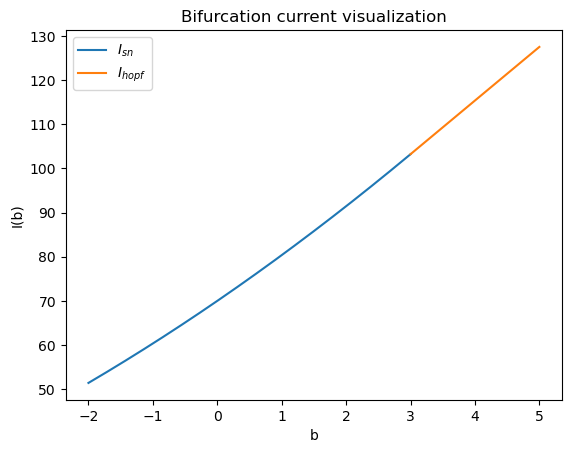

In [78]:
b_array = np.linspace(-2, 5, 7100)
b_saddle = b_array[np.where(b_array < 3)]
b_hopf = b_array[np.where(b_array >= 3)]

I_b_saddle = np.zeros(len(b_saddle))
I_b_hopf = np.zeros(len(b_hopf))

for idx, b in enumerate(b_saddle):
    simple_model.b = b
    I_b_saddle[idx] = simple_model.I_b()

for idx, b in enumerate(b_hopf):
    simple_model.b = b
    I_b_hopf[idx] = simple_model.I_b()
    
fig = plt.figure()
plt.plot(b_saddle, I_b_saddle, label = r"$I_{sn}$")
plt.plot(b_hopf, I_b_hopf, label = r"$I_{hopf}$")
plt.title("Bifurcation current visualization")
plt.xlabel("b")
plt.ylabel("I(b)")
plt.legend()
plt.show()
fig.savefig(fname='/Users/chengxinye/Documents/USRA Spring 2024/Figures_for_paper/Bogdanov-Takens Bifurcation.pdf', format="pdf", bbox_inches="tight")
plt.close()

# Figure 2.2 a

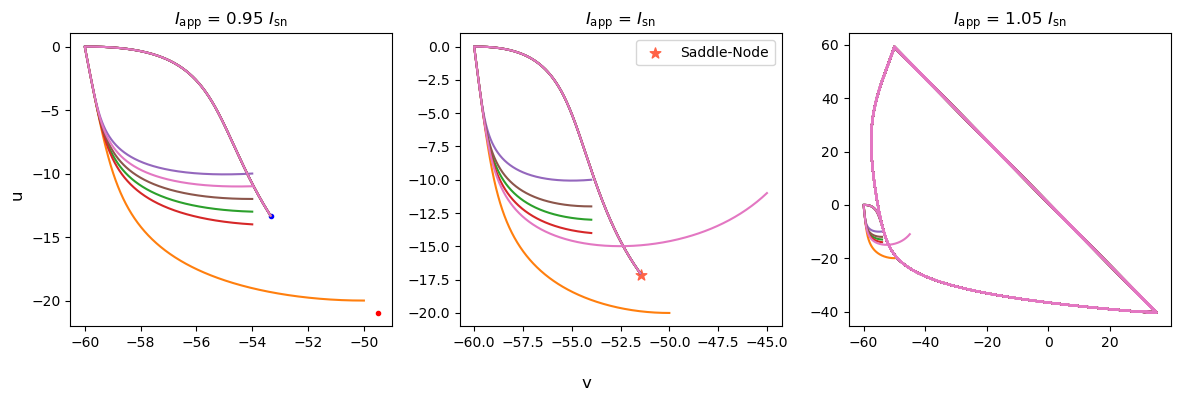

In [241]:
b = -2
simple_model.b = b
current_multiplier = [0.95, 1.0, 1.05]
h = 0.1
T = 5000 
datapoints = int(T/h)
C = 100
k = 0.7
vr = -60
vt = -40
a = 0.03
c = -50
d = 100
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[0] * simple_model.I_b()
# Plot the first subfigure
radicand = (vr-vt)**2 * k**2 + (-2*vr*b+2*b*vt-4*(I_app[int(0.5 * datapoints)]))*k + b**2
v_eq1 = (k*vt + k*vr + b + np.sqrt(radicand))/(2*k)
u_eq1 = b*(v_eq1 - vr)
v_eq2 = (k*vt + k*vr + b  - np.sqrt(radicand))/(2*k)
u_eq2 = b*(v_eq2 - vr)
axes[0].plot(v_eq1, u_eq1, 'red', marker = 'o', markersize = 3,)
axes[0].plot(v_eq2, u_eq2, 'blue', marker = 'o', markersize = 3,)
axes[0].set_title(r"$I_{\text{app}}$ = 0.95 $I_{\text{sn}}$")
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -14])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -10])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -12])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -11])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
# plot the second subfigure
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[1] * simple_model.I_b()
v_eq = (k*vt + k*vr + b)/(2*k)
u_eq = b*(v_eq - vr)
axes[1].scatter(v_eq, u_eq, marker = '*', color = 'tomato', s = 64, label="Saddle-Node")
axes[1].legend(loc = 'upper right')
axes[1].legend()
axes[1].set_title(r"$I_{\text{app}}$ = $I_{\text{sn}}$")
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -14])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -10])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -12])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-45, -11])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
# Plot the third subfigure
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[2] * simple_model.I_b()
axes[2].set_title(r"$I_{\text{app}}$ = 1.05 $I_{\text{sn}}$")
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -14])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -10])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -12])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-45, -11])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
# plt.close(fig)

fig.supxlabel("v")
fig.supylabel("u")
plt.tight_layout()
plt.show()
fig.savefig(fname='/Users/chengxinye/Documents/USRA Spring 2024/Figures_for_paper/phase_plane_b_-2.pdf', format="pdf", bbox_inches="tight")
plt.close(fig)

## Figure 2.2 b

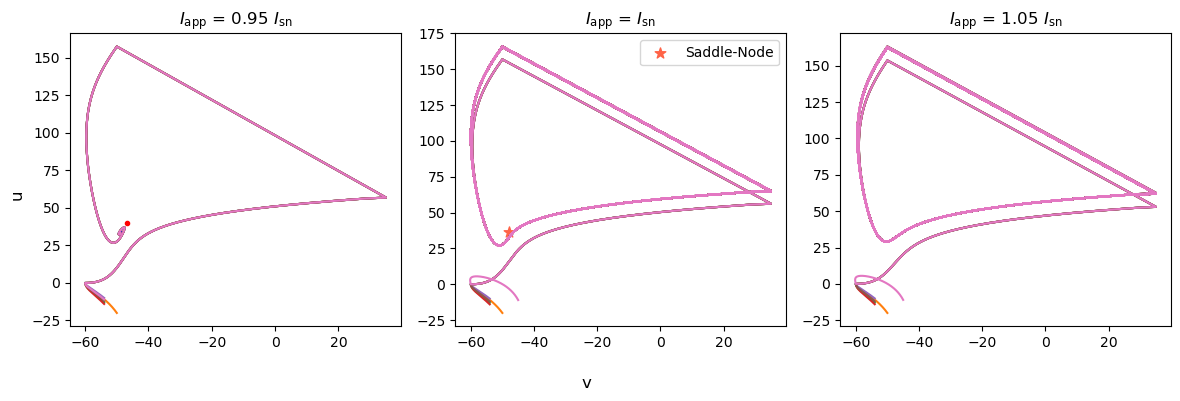

In [237]:
b = 3
simple_model.b = b
current_multiplier = [0.9915, 1.0, 1.05]
h = 0.1
T = 5000 
datapoints = int(T/h)
C = 100
k = 0.7
vr = -60
vt = -40
a = 0.03
c = -50
d = 100
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[0] * simple_model.I_b()
# Plot the first subfigure
radicand = (vr-vt)**2 * k**2 + (-2*vr*b+2*b*vt-4*(I_app[int(0.5 * datapoints)]))*k + b**2
v_eq1 = (k*vt + k*vr + b + np.sqrt(radicand))/(2*k)
u_eq1 = b*(v_eq1 - vr)
v_eq2 = (k*vt + k*vr + b  - np.sqrt(radicand))/(2*k)
u_eq2 = b*(v_eq2 - vr)
axes[0].plot(v_eq1, u_eq1, 'red', marker = 'o', markersize = 3,)
axes[0].plot(v_eq2, u_eq2, 'blue', marker = 'o', markersize = 3,)
axes[0].set_title(r"$I_{\text{app}}$ = 0.95 $I_{\text{BT}}$")
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -14])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -10])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -12])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -11])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
# plot the second subfigure
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[1] * simple_model.I_b()
v_eq = (k*vt + k*vr + b)/(2*k)
u_eq = b*(v_eq - vr)
axes[1].scatter(v_eq, u_eq, marker = '*', color = 'tomato', s = 64, label="Saddle-Node")
axes[1].legend(loc = 'upper right')
axes[1].legend()
axes[1].set_title(r"$I_{\text{app}}$ = $I_{\text{BT}}$")
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -14])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -10])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -12])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-45, -11])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
# Plot the third subfigure
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[2] * simple_model.I_b()
axes[2].set_title(r"$I_{\text{app}}$ = 1.05 $I_{\text{BT}}$")
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -14])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -10])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-54, -12])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-45, -11])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
# plt.close(fig)

fig.supxlabel("v")
fig.supylabel("u")
plt.tight_layout()
plt.show()
fig.savefig(fname='/Users/chengxinye/Documents/USRA Spring 2024/Figures_for_paper/phase_plane_b_3.pdf', format="pdf", bbox_inches="tight")
plt.close(fig)

## Figure 2.2 c

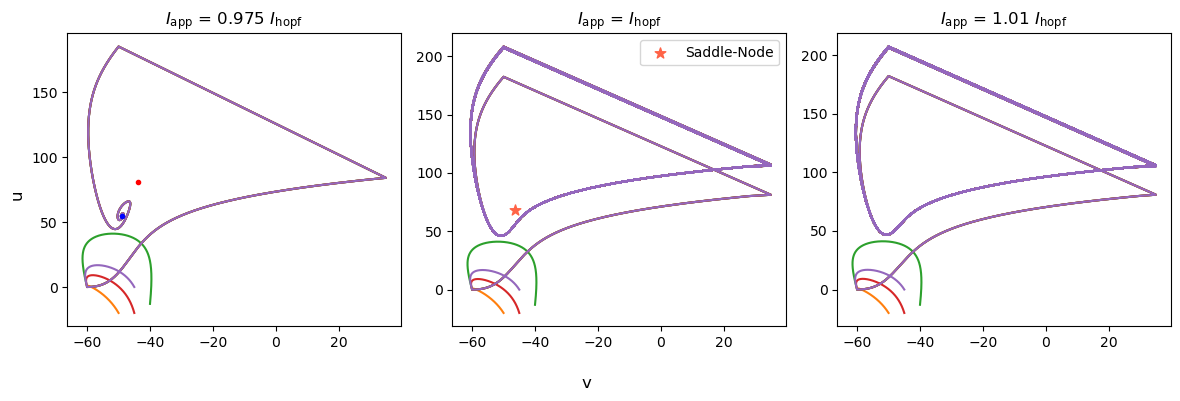

In [251]:
b = 5
simple_model.b = b
current_multiplier = [0.975, 1.0, 1.01]
h = 0.1
T = 5000 
datapoints = int(T/h)
C = 100
k = 0.7
vr = -60
vt = -40
a = 0.03
c = -50
d = 100
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[0] * simple_model.I_b()
# Plot the first subfigure
radicand = (vr-vt)**2 * k**2 + (-2*vr*b+2*b*vt-4*(I_app[int(0.5 * datapoints)]))*k + b**2
v_eq1 = (k*vt + k*vr + b + np.sqrt(radicand))/(2*k)
u_eq1 = b*(v_eq1 - vr)
v_eq2 = (k*vt + k*vr + b  - np.sqrt(radicand))/(2*k)
u_eq2 = b*(v_eq2 - vr)
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-40, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-45, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
IC = np.array([-45, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[0].plot(soln['voltage'], soln['current'])
axes[0].plot(v_eq1, u_eq1, 'red', marker = 'o', markersize = 3,)
axes[0].plot(v_eq2, u_eq2, 'blue', marker = 'o', markersize = 3,)
axes[0].set_title(r"$I_{\text{app}}$ = 0.975 $I_{\text{hopf}}$")
# plot the second subfigure
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[1] * simple_model.I_b()
v_eq = (k*vt + k*vr + b)/(2*k)
u_eq = b*(v_eq - vr)
axes[1].scatter(v_eq, u_eq, marker = '*', color = 'tomato', s = 64, label="Saddle-Node")
axes[1].legend(loc = 'upper right')
axes[1].legend()
axes[1].set_title(r"$I_{\text{app}}$ = $I_{\text{hopf}}$")
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-40, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-45, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
IC = np.array([-45, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[1].plot(soln['voltage'], soln['current'])
# Plot the third subfigure
I_app = np.zeros(datapoints)
I_app[int(0.2*datapoints):] = current_multiplier[2] * simple_model.I_b()
axes[2].set_title(r"$I_{\text{app}}$ = 1.01 $I_{\text{hopf}}$")
IC = np.array([simple_model.vr, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-50, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-40, -13])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-45, -20])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
IC = np.array([-45, 0])
soln = simple_model.forward_euler(IC, h, T, I_app) 
axes[2].plot(soln['voltage'], soln['current'])
# plt.close(fig)

fig.supxlabel("v")
fig.supylabel("u")
plt.tight_layout()
plt.show()
fig.savefig(fname='/Users/chengxinye/Documents/USRA Spring 2024/Figures_for_paper/phase_plane_b_5.pdf', format="pdf", bbox_inches="tight")
plt.close(fig)

# Archives

In [ ]:
    def iPRC_Trapezoidal(self, IC):
        '''
        iPRC computes the infinitesimal PRC of the simple model of choice using the Trapezoidal rule 
        by firsting getting the stable limit cycle from get_stable_soln method and returns the result of 
        iPRC data and the iPRC time
        
        return:
        iPRC data: array of floats, the voltage component, Z^v
        iPRC time: array of floats, from 0 to h * T
        '''
        stable_lc = self.get_stable_soln(IC, self.h, self.T)
        A_t = self.adjoint_A(stable_lc['voltage'])
        
        
        I_2 = np.identity(2)
        Zero_2 = np.zeros((2,2), dtype = float)

        # T = stable_lc['time'][-1] - stable_lc['time'][0]
        # time step is the division between total time T, and number of 
        # elements in A_t
        # h = (stable_lc['time'][-1] - stable_lc['time'][0])/(A_t.shape[0])
        h = self.h
        iter_max = A_t.shape[0] - 1 # the number of discretization
        b_vec = np.array([])
        for i in range(iter_max):
            b_vec = np.append(b_vec, [0, 0])
        b_vec = np.append(b_vec, [0, 1])
        b_vec = b_vec.reshape(-1, 1)
        
        indic_mat = np.zeros((iter_max, iter_max + 1), dtype = int)
        # the iter_max here are row and columns 
        for i in range(iter_max):
            indic_mat[i, 0 + 1 * i] = 1 # 1 indicates an alpha
            indic_mat[i, 1 + 1 * i] = 2 # 2 indicates a beta
    

        R = np.zeros((iter_max * 2, (iter_max + 1) * 2), dtype = float) # this is the matrix we want to invert
        with tqdm(total=iter_max) as pbar: # adding a progress bar
            for i, row in enumerate(indic_mat):
                R_row = np.zeros((2, (iter_max + 1) * 2), dtype = float)
                for j, column in enumerate(row):
                    if column == 1: # means we have alpha in R from indic_mat
                        alpha_i = -(I_2 + h/2 * A_t[i])
                        R_row[:,(j * 2):(j*2 + 2)] = alpha_i
                    elif column == 2: # means we have beta in R from indic_mat
                        beta_i = (I_2 - h/2 * A_t[i + 1])
                        R_row[:,(j * 2):(j*2 + 2)] = beta_i
                    else:
                        pass
                R[(i * 2):((i + 1)* 2),:] = R_row
                pbar.update(1)
        
        continuity_cond = []
        for column in range(R.shape[1]):
            if column == 1:
                continuity_cond.append(1)
            elif column == R.shape[1] - 1:
                continuity_cond.append(-1)
            else:
                continuity_cond.append(0)
        continuity_cond = np.array(continuity_cond)
    
        normalizing_cond = []
        f_at_init_lc = stable_lc['dv']
        dv_at_lc = stable_lc['dv']
        du_at_lc = stable_lc['du']
        for column in range(R.shape[1]):
            if column == 0:
                normalizing_cond.append(dv_at_lc[0])
            elif column == 1:
                normalizing_cond.append(du_at_lc[0])
            else:
                normalizing_cond.append(0)

        normalizing_cond = np.array(normalizing_cond)
        # Reshape normalizing_cond and continuity_cond to column vectors
        normalizing_cond = normalizing_cond.reshape(1, -1)
        continuity_cond = continuity_cond.reshape(1, -1)
        # Combine normalizing_cond and continuity_cond into a single matrix (2, col)
        new_rows = np.vstack([continuity_cond, normalizing_cond])
        # Concatenate the new rows to R
        R = np.vstack([R, new_rows])
        # Then we compute x = R^{-1} b_vec
        iPRC_data = inv(R) @ b_vec
        iPRC_data = iPRC_data
        iPRC_time = np.linspace(0, h * T , len(iPRC_data//2))
        iPRC_result = {'iPRC': iPRC_data, 'time': iPRC_time, 'phases': stable_lc['phase']}
        return iPRC_result
